# Business Understanding

## Problem Statement
Industri telekomunikasi saat ini dihadapkan pada dinamika persaingan yang semakin ketat. Para penyedia layanan telekomunikasi berlomba untuk menambah jumlah pelanggan, tetapi dihadapkan pada masalah pelanggan yang beralih ke kompetitor karena faktor seperti ketidakpuasan terhadap kualitas layanan, harga, atau dukungan pelanggan.
Jika pelanggan memutuskan untuk berhenti (Churn), perusahaan bukan hanya kehilangan pendapatan berkelanjutan, tetapi juga harus mengeluarkan biaya yang lebih besar untuk menarik pelanggan baru. Dalam kondisi ini, churn pelanggan tidak hanya berdampak pada revenue, tapi juga membebani efisiensi operasional dan profitabilitas perusahaan.

## Goals
Tujuan utama dari analisis ini adalah untuk membangun sistem yang dapat memprediksi pelanggan yang berisiko tinggi melakukan churn. Dengan prediksi ini, perusahaan dapat merancang strategi retensi yang tepat sasaran untuk mengurangi tingkat churn.

Selain itu, analisis ini juga bertujuan untuk memahami karakteristik dan faktor-faktor yang mendorong pelanggan untuk churn. Dengan memahami faktor-faktor ini, perusahaan dapat mengambil langkah-langkah preventif yang lebih efektif untuk meningkatkan kepuasan dan loyalitas pelanggan, sehingga mempertahankan pelanggan yang sudah ada.

## Analytic Approach
Pendekatan yang akan digunakan dalam proyek ini adalah analisis data historis pelanggan untuk mengidentifikasi pola yang membedakan pelanggan yang tetap setia dengan yang memutuskan berhenti berlangganan. Selanjutnya, akan diterapkan algoritma Machine Learning sebagai model klasifikasi untuk memprediksi potensi churn pada pelanggan baru maupun yang sedang aktif, sehingga membantu perusahaan memprediksi risiko churn dengan lebih akurat dan mendukung pengambilan keputusan strategis.

## Metric Evaluation

Type 1 Error (False Positive): Memprediksi pelanggan akan churn padahal mereka tidak churn. Hal ini menyebabkan pemborosan biaya pemasaran atau upaya retensi yang tidak perlu.

Type 2 Error (False Negative): Gagal memprediksi pelanggan yang benar-benar akan churn. Hal ini menyebabkan kehilangan pelanggan, yang berdampak langsung pada hilangnya pendapatan tetap.

Dalam industri telekomunikasi, False Negative lebih berbahaya karena biaya akuisisi pelanggan baru umumnya jauh lebih tinggi dibandingkan dengan biaya mempertahankan pelanggan lama. Oleh karena itu, fokus evaluasi model akan diarahkan untuk meminimalkan False Negative, sehingga perusahaan bisa mengurangi tingkat churn secara efektif dan menjaga stabilitas bisnis.

## Data Description

| **Kolom**            | **Deskripsi**                                                   |
| -------------------- | --------------------------------------------------------------- |
| **Dependents**       | Apakah pelanggan memiliki tanggungan (anak, pasangan, dll.)     |
| **Tenure**           | Lama (dalam bulan) pelanggan menggunakan layanan                |
| **OnlineSecurity**   | Apakah pelanggan memiliki layanan keamanan online               |
| **OnlineBackup**     | Apakah pelanggan memiliki cadangan data online                  |
| **InternetService**  | Jenis layanan internet yang digunakan (DSL, Fiber, Tidak ada)   |
| **DeviceProtection** | Apakah perangkat pelanggan dilindungi melalui layanan proteksi  |
| **TechSupport**      | Apakah pelanggan memiliki akses ke bantuan teknis               |
| **Contract**         | Jenis kontrak (bulanan, 1 tahun, 2 tahun)                       |
| **PaperlessBilling** | Apakah pelanggan menggunakan tagihan tanpa kertas               |
| **MonthlyCharges**   | Biaya bulanan yang dibayar pelanggan                            |
| **Churn**            | Target variable: apakah pelanggan meninggalkan layanan (Yes/No) |

# Import Packages

In [48]:
%%capture
!pip install jcopml
!pip install category_encoders
!pip install imblearn
!pip install dython

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures, PowerTransformer, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

from jcopml.tuning import random_search_params as rsp
from jcopml.tuning import grid_search_params as gsp
from jcopml.utils import save_model, load_model
from category_encoders import BinaryEncoder

# Associaton Nominal
from dython.nominal import associations

# Train-Test split and CrossVal
from sklearn.model_selection import GridSearchCV,StratifiedKFold, train_test_split, cross_validate, cross_val_score
from sklearn.preprocessing import OneHotEncoder

# Transfrom & One-Hot Encoding
from sklearn.compose import ColumnTransformer
from category_encoders import OrdinalEncoder, BinaryEncoder


# Modeling
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import IsolationForest

# Metrics Evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay

# Handling Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import make_scorer, fbeta_score

# Load Data

In [50]:
df = df = pd.read_csv("data_telco_customer_churn.csv")
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


# Data Preprocessing

## Data Information

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [52]:
# Looping untuk mengambil nilai unik dari setiap kolom

pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
tabel_desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Total Unique', 'Sampel Unique'],
                     data=listItem)
tabel_desc

,Nama Kolom,Jumlah Total Unique,Sampel Unique
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63..."
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35..."


## Missing Value

In [53]:
# Checking Missing Value
df.isna().sum()

,0
Dependents,0
tenure,0
OnlineSecurity,0
OnlineBackup,0
InternetService,0
DeviceProtection,0
TechSupport,0
Contract,0
PaperlessBilling,0
MonthlyCharges,0


## Duplicates

In [54]:
# Checking Duplicates
df.duplicated().sum()

np.int64(77)

In [55]:
# menghapus duplikat
df.drop_duplicates(inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 455.0+ KB


# Numerical Features

## Deskriptive Statistics

In [57]:
df.describe()

,tenure,MonthlyCharges
count,4853.000000,4853.000000
mean,32.679992,65.321543
std,24.395554,29.783655
min,0.000000,18.800000
25%,9.000000,40.050000
50%,29.000000,70.600000
75%,56.000000,90.050000
max,72.000000,118.650000


Pelanggan Telco dalam dataset ini rata-rata memiliki masa langganan (tenure) selama 32.68 bulan, dengan beberapa pelanggan bertahan hingga 72 bulan. Sebanyak 25% pelanggan hanya bertahan hingga 9 bulan, sementara setengah dari total pelanggan memiliki masa langganan di bawah 29 bulan. Di sisi lain, 25% pelanggan telah menggunakan layanan lebih dari 56 bulan.

Dalam hal biaya bulanan, pelanggan rata-rata membayar sebesar $65.32, dengan tagihan terendah sebesar $18.80 dan yang tertinggi mencapai $118.65.
Sebanyak setengah dari total pelanggan memiliki tagihan bulanan di bawah $70.60, sementara seperempat pelanggan memiliki tagihan di atas $90.05 per bulan. Penyebaran biaya bulanan ini menunjukkan adanya variasi yang cukup besar dalam paket layanan yang digunakan.

## Data Distribution

<Figure size 2000x1500 with 0 Axes>

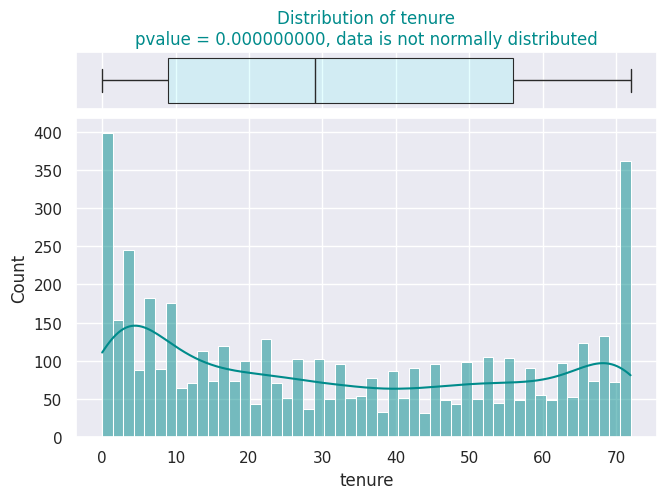

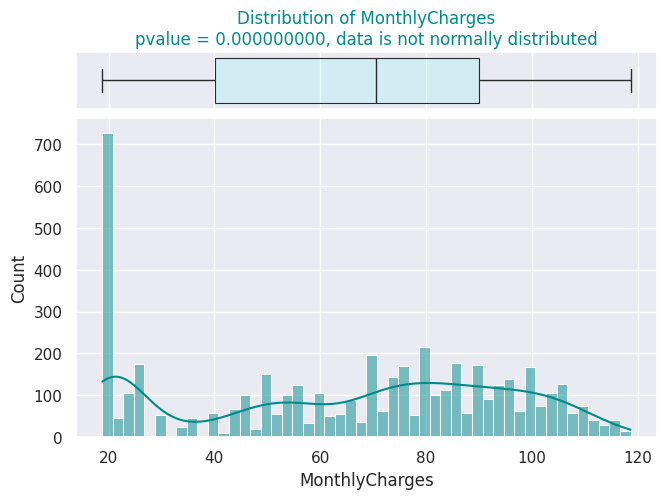

In [58]:
# Statistical Test
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Set the seaborn style to dark with a custom color palette
sns.set_theme(style="darkgrid", palette="dark:#008b8b")  # Dark cyan color

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot the distribution of numerical data in the dataset along with hypothesis testing using normaltest
plt.figure(figsize=(20,15))

for column in numerical_columns:

    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(7.5,5),
                                    gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

    # Perform normality test (normaltest)
    stat, pvalue = normaltest(df[column].dropna())

    # Determine normality based on p-value
    if pvalue > 0.05:
        distribution = f'pvalue = {pvalue:.9f}, data is normally distributed'
    else:
        distribution = f'pvalue = {pvalue:.9f}, data is not normally distributed'

    # Set title with result of normality test
    ax1.set_title(f"Distribution of {column}\n{distribution}", color="darkcyan")

    # Boxplot for the column with transparent background
    sns.boxplot(x=df[column], ax=ax1, color="darkcyan",
                boxprops=dict(facecolor=(0, 1, 1, 0.1), linewidth=0.8))  # Transparent boxplot
    ax1.set(xlabel="")

    # Histogram and KDE for the column
    sns.histplot(df[column], ax=ax2, stat="count", kde=True, bins=50, color="darkcyan")

# Show all plots after finishing the loop
plt.show()

Distribusi data tenure bersifat bimodal dan tidak normal, menunjukkan dua kelompok besar pelanggan: yang baru bergabung dan yang sudah lama berlangganan. Sementara itu, distribusi Monthly Charges juga tidak normal dan cenderung right-skewed, dengan sebagian besar pelanggan membayar di kisaran rendah namun ada sebaran yang cukup lebar hingga nilai tinggi. Pola ini menegaskan bahwa kedua variabel memiliki distribusi yang tidak normal.


## Correlation Matrix

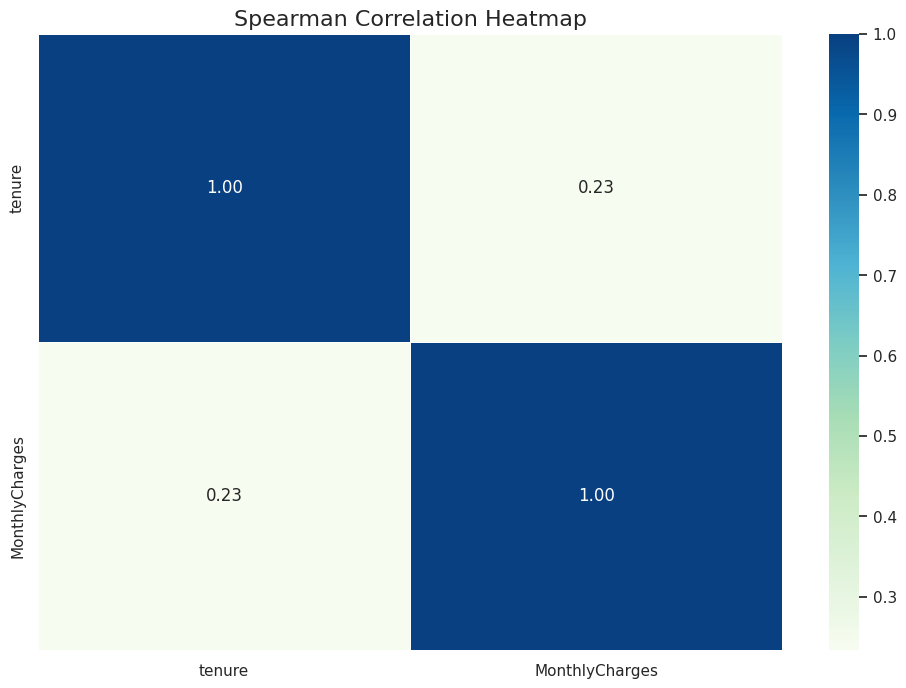

In [59]:
# create correlation heatmap numeric
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='GnBu', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.show()

Heatmap ini menunjukkan hubungan monotonic lemah antara fitur `tenure` dan `MonthlyCharges`, dengan koefisien korelasi sebesar 0.23. Ini mengindikasikan bahwa pelanggan dengan masa berlangganan lebih lama cenderung memiliki biaya bulanan sedikit lebih tinggi, meskipun hubungan ini tidak kuat. Kedua fitur memiliki korelasi sempurna (1.00) dengan dirinya sendiri, sesuai sifat heatmap, sementara hubungan silang lainnya mendekati nol, menandakan tidak ada hubungan monotonic signifikan dengan fitur lain. Nilai 0.23 ini menyiratkan bahwa `tenure` dan `MonthlyCharges` berkontribusi secara terpisah terhadap churn: `tenure` yang lebih panjang cenderung menurunkan risiko churn, sedangkan `MonthlyCharges` yang tinggi bisa meningkatkannya, sejalan dengan hasil model sebelumnya.

# Categorical Features

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4853 non-null   object 
 1   tenure            4853 non-null   int64  
 2   OnlineSecurity    4853 non-null   object 
 3   OnlineBackup      4853 non-null   object 
 4   InternetService   4853 non-null   object 
 5   DeviceProtection  4853 non-null   object 
 6   TechSupport       4853 non-null   object 
 7   Contract          4853 non-null   object 
 8   PaperlessBilling  4853 non-null   object 
 9   MonthlyCharges    4853 non-null   float64
 10  Churn             4853 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 455.0+ KB


In [61]:
df.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4853,4853,4853,4853,4853,4853,4853,4853,4853
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3380,2420,2148,2154,2162,2442,2665,2925,3565


Mayoritas pelanggan Telco dalam dataset ini tidak memiliki tanggungan (Dependents), dengan sebanyak 3380 pelanggan atau sekitar 70% menyatakan "No". Dalam hal layanan keamanan digital, sebanyak 2420 pelanggan memilih untuk tidak menggunakan layanan keamanan online (OnlineSecurity), dan tren yang sama juga terlihat pada layanan OnlineBackup, yang tidak digunakan oleh 2148 pelanggan.

Layanan internet yang paling populer adalah Fiber optic, dipilih oleh 2154 pelanggan atau sekitar 44% dari total populasi. Untuk perlindungan perangkat (DeviceProtection), sebanyak 2162 pelanggan memilih tidak menggunakan layanan ini. Dukungan teknis (TechSupport) juga relatif rendah penggunaannya, dengan 2442 pelanggan menyatakan tidak memanfaatkan layanan tersebut.

Dalam hal kontrak, mayoritas pelanggan memilih tipe kontrak yang paling fleksibel, yaitu Month-to-month, yang digunakan oleh 2665 pelanggan atau lebih dari 55%. Hal ini menunjukkan preferensi pelanggan terhadap kebebasan tanpa ikatan jangka panjang. Selain itu, skema PaperlessBilling semakin populer, dengan 2925 pelanggan memilih opsi tagihan tanpa kertas, mencerminkan tren menuju digitalisasi.

Terakhir, Tingkat churn di kalangan pelanggan Telco tercatat sebesar 26.6%, di mana dari 4853 pelanggan, sebanyak 1288 orang telah berhenti berlangganan, sementara 3565 pelanggan atau 73.4% masih aktif.

# Distribusi Data Kategorik terhadap Churn

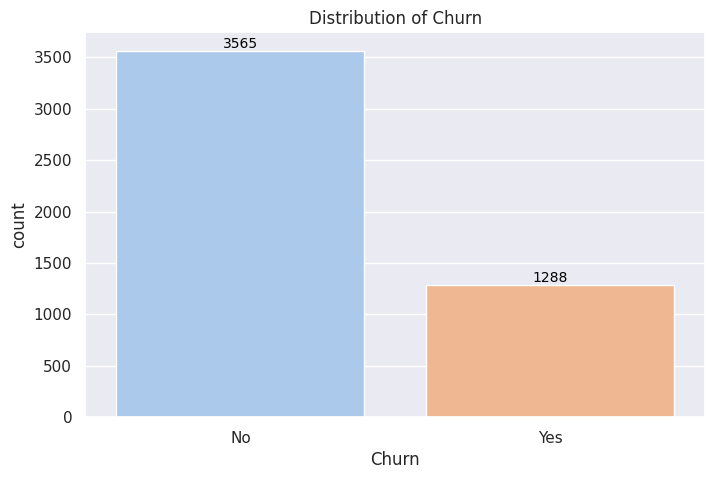

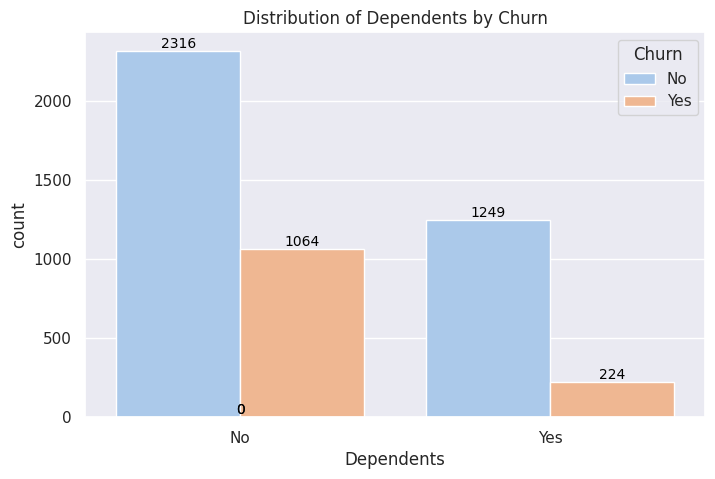

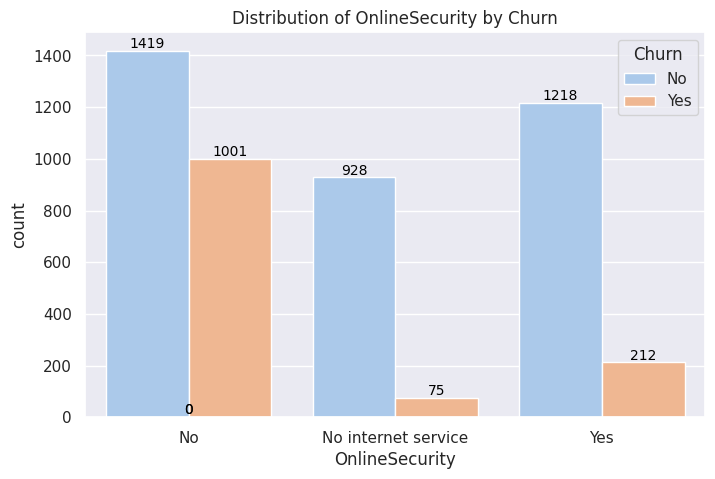

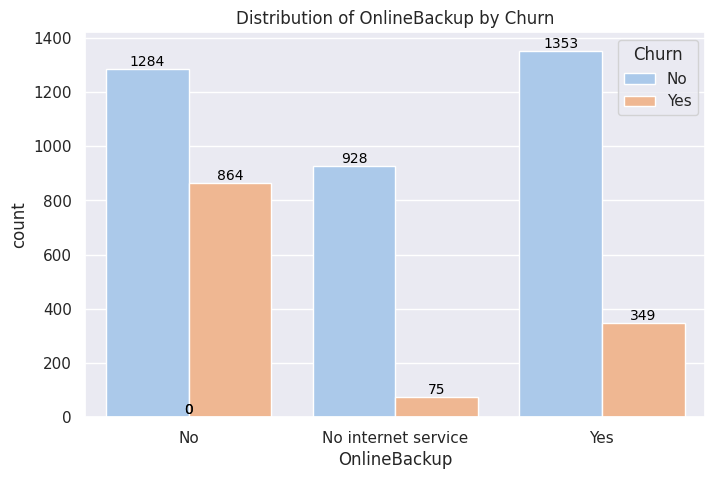

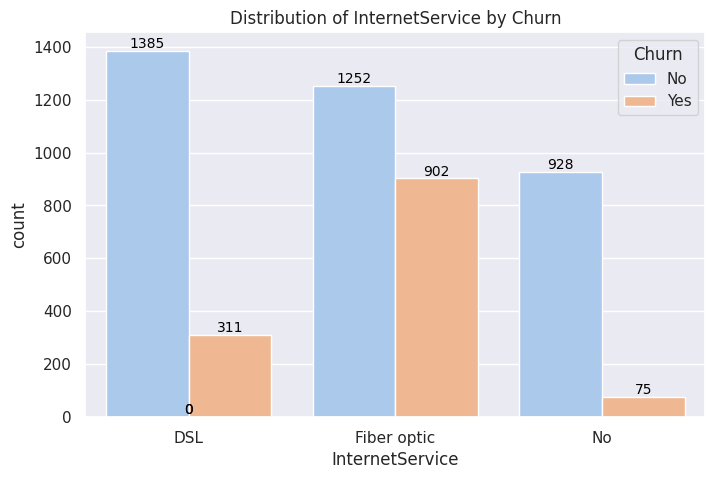

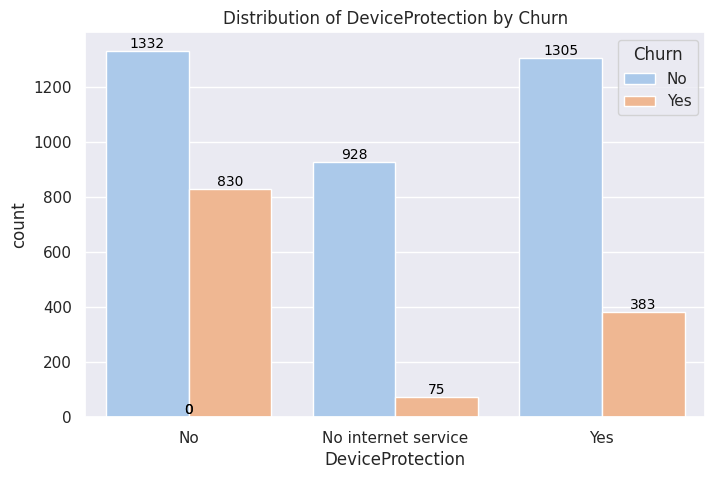

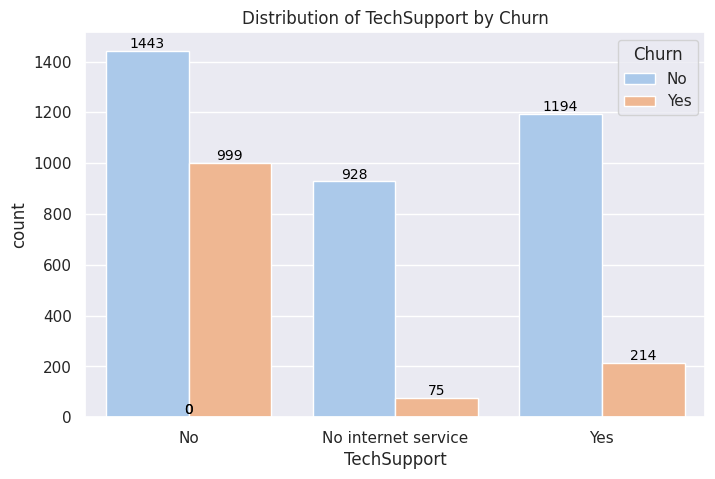

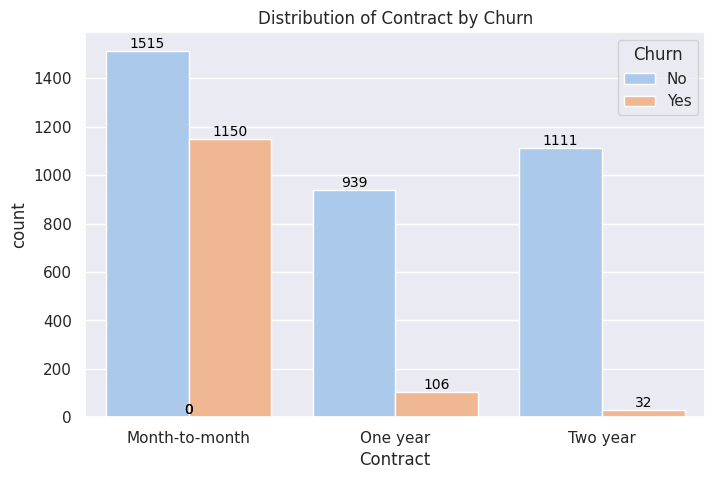

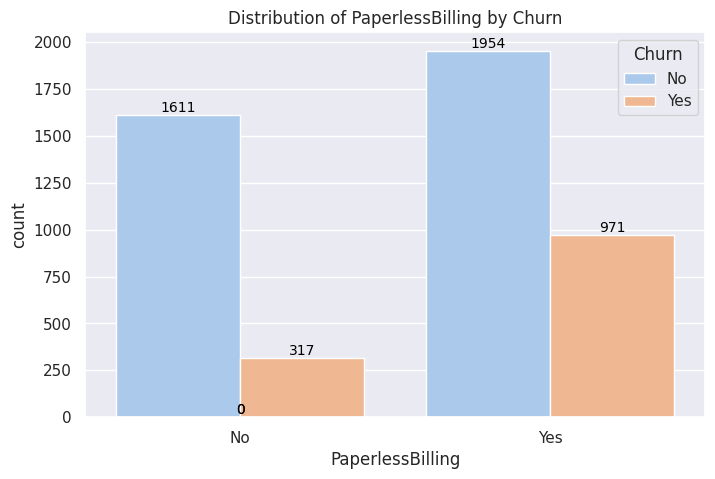

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
                       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'Churn']

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Fungsi untuk menambahkan label count di atas bar
def add_bar_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

# Plot distribusi churn dengan warna terang
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribution of Churn')
add_bar_labels(ax)
plt.show()

# Exclude target variable
categorical_columns.remove('Churn')

# Plot tiap kategori dengan churn
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=col, hue='Churn', data=df, palette='pastel')
    plt.title(f'Distribution of {col} by Churn')
    add_bar_labels(ax)
    plt.show()


Dari visualisasi di atas kita dapat menarik beberapa pola penting terkait faktor–faktor yang memengaruhi churn pelanggan. Pertama, pelanggan dengan kontrak month-to-month memiliki tingkat churn tertinggi (sekitar 43 %), sedangkan mereka yang berlangganan kontrak satu tahun atau dua tahun jauh lebih stabil (masing-masing sekitar 10 % dan 3 %). Kedua, jenis layanan internet berpengaruh besar: pelanggan fiber optic menunjukkan churn sangat tinggi (±42 %), jauh di atas pelanggan DSL (±18 %) atau yang tidak menggunakan layanan internet (±7,5 %). Ketiga, pelanggan yang menambahkan fitur-fitur keamanan dan dukungan—seperti Online Security, Online Backup, Device Protection, dan Tech Support—cenderung lebih setia; misalnya, hanya sekitar 15–22 % pelanggan dengan Online Security maupun Device Protection yang churn, dibandingkan 38–41 % pada mereka yang tidak memiliki layanan tersebut. Keempat, penggunaan Paperless Billing ternyata juga berkaitan dengan churn lebih tinggi (±33 % versus ±16 % pada yang tetap menerima tagihan kertas), dan pelanggan tanpa tanggungan (dependents) lebih rentan berhenti berlangganan (±31 %) dibandingkan mereka yang memiliki tanggungan (±15 %). Secara keseluruhan, model churn akan sangat terbantu dengan memasukkan variabel kontrak, tipe InternetService, PaperlessBilling, serta indikasi kepemilikan add-on services untuk memprediksi pelanggan yang berisiko berhenti.

# Distribusi Data Numerik terhadap Churn

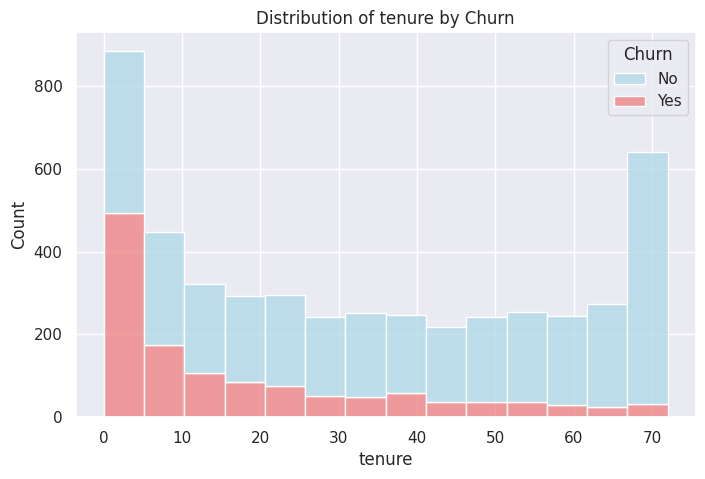

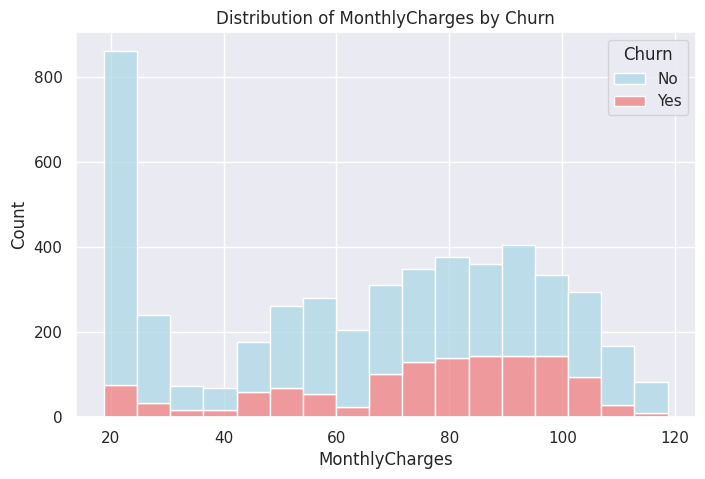

In [63]:
numerical_columns = ['tenure', 'MonthlyCharges']
palette = {'No': 'lightblue', 'Yes': 'lightcoral'}

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue='Churn', multiple='stack', palette=palette)
    plt.title(f'Distribution of {col} by Churn')
    plt.show()


Berdasarkan visualisasi yang ditampilkan, terlihat pola yang jelas antara churn pelanggan dengan masa tenure dan biaya bulanan. Pada grafik distribusi tenure berdasarkan churn, tampak bahwa pelanggan dengan masa berlangganan yang lebih pendek (0-10 bulan) memiliki tingkat churn yang signifikan lebih tinggi dibandingkan pelanggan yang telah berlangganan lebih lama. Sementara itu, grafik distribusi MonthlyCharges menunjukkan bahwa churn cenderung lebih tinggi pada pelanggan dengan biaya bulanan berkisar antara 70-100, yang ditandai dengan proporsi warna merah ("Yes" untuk churn) yang lebih dominan di rentang tersebut. Hal ini mengindikasikan bahwa pelanggan baru dan pelanggan dengan tagihan bulanan yang relatif tinggi merupakan segmen yang berisiko tinggi untuk meninggalkan layanan telekomunikasi, sehingga perusahaan perlu memberikan perhatian khusus pada retensi pelanggan di dua segmen tersebut.

# Check Keseimbangan Churn

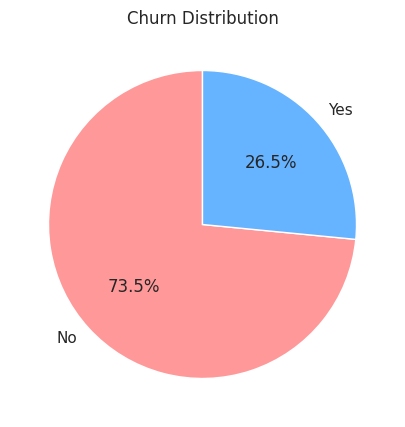

In [64]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Churn Distribution')
plt.show()


Diagram pie ini menunjukkan ketidakseimbangan yang signifikan dalam distribusi variabel target "Churn", dimana sebesar 26,5% pelanggan telah meninggalkan layanan (churn = Yes), sementara 73,5% pelanggan masih tetap berlangganan (churn = No). Angka churn sebesar 26,5% ini tergolong cukup tinggi untuk industri telekomunikasi, yang mengindikasikan adanya masalah signifikan dalam retensi pelanggan. Ketidakseimbangan ini dapat menyebabkan model machine learning yang dilatih dengan data ini menjadi bias terhadap kelas mayoritas, sehingga berpotensi menghasilkan prediksi yang tidak akurat untuk kelas minoritas. Untuk mengatasi masalah ini sebelum pemodelan, perlu dilakukan teknik resampling seperti oversampling pada kelas minoritas atau undersampling pada kelas mayoritas. Selain itu, penggunaan algoritma yang tepat dan metrik evaluasi yang sesuai juga penting untuk memastikan performa model yang adil dan akurat.

# Data Preparation

In [65]:
# Setting Variabel Target menjadi 1 dan 0
# Ubah variabel Churn menjadi 1 = Yes dan 0 = No

df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

Variabel Target (Churn) :

1 : Pelanggan tidak melanjutkan layanan internet (Yes) --> Positive

0 : Pelanggan tetap menggunakan layanan internet (No) --> Negative

In [66]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split data test menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3882, 10), (971, 10), (3882,), (971,))

In [67]:
def num_pipe(impute='median', poly=None, scaling=None, n_neighbors=5,
             max_iter=10, weights="uniform"):

  # pastikan parameter diatas diinput dengan benar
  if impute not in ['knn', 'mean', 'median', 'iterative', None]:
    raise Exception("impute only supports {'knn', 'mean', 'median', None}")
  if scaling not in ['standard', 'minmax', 'robust', 'maxabs', 'normalize', None]:
    raise Exception("scaling only supports {'standard', 'minmax', 'robust', 'maxabs', 'normalize'}")
  if (type(poly) is not int) and (poly is not None):
    raise Exception("poly should be int or None")

  # define imputer
  if impute is None:
    steps = []
  elif impute == "knn":
    steps = [('imputer', KNNImputer(n_neighbors=n_neighbors, weights=weights))]
  elif impute == "iterative":
    steps = [('imputer', IterativeImputer(max_iter=max_iter, random_state=0))]
  elif impute == "constant":
    steps = [('imputer', SimpleImputer(strategy=impute, fill_value="no_info"))]
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  # define poly jika digunakan
  if poly is not None:
    steps.append(('poly', PolynomialFeatures(poly)))

  # define scaling jika digunakan
  if scaling == 'standard':
    steps.append(('scaler', StandardScaler()))
  elif scaling == 'minmax':
    steps.append(('scaler', MinMaxScaler()))
  elif scaling == 'robust':
    steps.append(('scaler', RobustScaler()))

  return Pipeline(steps)

def cat_pipe(impute='most_frequent', encoder='onehot'):
  if impute not in ['most_frequent', 'constant', None]:
    raise Exception("impute only supports {'most_frequent', None}")
  if encoder not in ['onehot', 'ordinal', 'binary', None]:
    raise Exception("encoder should be boolean {'onehot', 'ordinal', 'binary', None}")

  if impute is None:
    steps = []
  else:
    steps = [('imputer', SimpleImputer(strategy=impute))]

  if encoder is not None:
    if encoder == 'onehot':
      steps.append(('onehot', OneHotEncoder(handle_unknown='ignore')))
    elif encoder == 'ordinal':
      steps.append(('ordinal', OrdinalEncoder()))
    elif encoder == 'binary':
      steps.append(('binary', BinaryEncoder()))

  return Pipeline(steps)

In [68]:
X_train.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
4072,No,6,Yes,Yes,DSL,No,No,Month-to-month,Yes,55.70
4512,No,46,No,Yes,Fiber optic,No,Yes,One year,Yes,103.15
3970,Yes,55,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.30
342,No,21,No,Yes,DSL,No,Yes,Month-to-month,Yes,36.00
4431,No,3,No,No,Fiber optic,No,No,Month-to-month,Yes,69.55


In [69]:
# Define kolom berdasarkan tipenya
numeric_columns = ['tenure', 'MonthlyCharges']
one_hot_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
ordinal_cols = ['Contract']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
])

# Experiment 1 - Menggunakan Semua Fitur tanpa Resampling

In [70]:
# Individual Models
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
gb = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(verbose=-1,objective='binary', random_state=42)


# Voting Classifier - Hard Voting
vc_hard = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('xgb', xgb)
    ],
    voting='hard'
)

# Voting Classifier - Soft Voting
vc_soft = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('dt', dt),
        ('xgb', xgb)
    ],
    voting='soft'
)

# Stacking Classifier
base_model = [
    ('lr', lr),
    ('dt', dt),
    ('xgb', xgb)
]
meta_model = LogisticRegression()  # Meta model for stacking
stacking = StackingClassifier(estimators=base_model, final_estimator=meta_model)

Pada tahap ini, berbagai model klasifikasi digunakan untuk memprediksi churn pelanggan, termasuk Logistic Regression (LR), Decision Tree (DT), K-Nearest Neighbors (KNN), Gradient Boosting (GB), XGBoost (XGB), Random Forest (RF), dan LightGBM (LGBM). Selain model individu, teknik ensemble learning diterapkan untuk meningkatkan performa model. Voting Classifier digunakan dalam dua varian: Hard Voting, yang memilih kelas berdasarkan mayoritas prediksi dari model, dan Soft Voting, yang menghitung probabilitas rata-rata dari semua model untuk menentukan kelas akhir. Selain itu, Stacking Classifier digunakan dengan Logistic Regression sebagai meta-model, yang menggabungkan prediksi dari beberapa model dasar (LR, DT, XGB) untuk meningkatkan akurasi. Pendekatan ini membantu dalam menangani kompleksitas data dan meningkatkan generalisasi model terhadap data baru.

In [71]:
# Definisi custom scorer untuk F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'K-Nearest Neighbors': knn,
    'Voting Classifier (Hard)': vc_hard,
    'Voting Classifier (Soft)': vc_soft,
    'Stacking': stacking,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
    'LightGBM': lgbm
}

results = []

# K-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f'Model: {model_name} processing...')

    # Pipeline
    pipeline = Pipeline(steps=[
        ('prep', preprocessor),
        ('model', model)
    ])

    # Perform cross-validation with F2-score, recall, and precision
    scores = cross_validate(pipeline, X_train, y_train, cv=cv,
                            scoring={'f2': f2_scorer, 'recall': 'recall', 'precision': 'precision'})

    # Store results
    results.append({
        'Model': model_name,
        'Mean F2 Score': np.mean(scores['test_f2']),
        'Mean Recall': np.mean(scores['test_recall']),
        'Mean Precision': np.mean(scores['test_precision']),
        'Std F2 Score': np.std(scores['test_f2']),
        'Std Recall': np.std(scores['test_recall']),
        'Std Precision': np.std(scores['test_precision'])
    })

# Convert to DataFrame
results_df_exp1_tf1 = pd.DataFrame(results)
results_df_exp1_tf1

Model: Logistic Regression processing...
Model: Decision Tree processing...
Model: K-Nearest Neighbors processing...
Model: Voting Classifier (Hard) processing...
Model: Voting Classifier (Soft) processing...
Model: Stacking processing...
Model: Random Forest processing...
Model: Gradient Boosting processing...
Model: XGBoost processing...
Model: LightGBM processing...


,Model,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Logistic Regression,0.534400,0.513592,0.638815,0.013882,0.011650,0.036621
1,Decision Tree,0.470840,0.469903,0.475696,0.034408,0.037901,0.024709
2,K-Nearest Neighbors,0.498274,0.484466,0.564146,0.024914,0.028702,0.016457
3,Voting Classifier (Hard),0.496192,0.476699,0.595655,0.020563,0.022011,0.036743
4,Voting Classifier (Soft),0.485577,0.469903,0.562031,0.023626,0.026482,0.021181
5,Stacking,0.520920,0.495146,0.658932,0.018447,0.015351,0.044196
6,Random Forest,0.470734,0.451456,0.569707,0.041156,0.043527,0.027880
7,Gradient Boosting,0.520040,0.496117,0.646549,0.023963,0.023662,0.045348
8,XGBoost,0.509523,0.494175,0.582320,0.020969,0.020226,0.029772
9,LightGBM,0.507553,0.488350,0.603577,0.024581,0.024291,0.037202


Tabel tersebut menunjukkan hasil eksperimen berbagai model machine learning untuk memprediksi customer churn. Model ensemble seperti Logistic Regression (F2 Score 0.534400), Stacking (F2 Score 0.520920) dan Gradient Boosting (F2 Score 0.520040)  menunjukkan performa terbaik secara keseluruhan, dengan fokus pada recall (penting untuk mendeteksi churn) dan precision yang seimbang. Karena ini adalah masalah churn prediction, recall penting untuk memastikan sebanyak mungkin pelanggan yang akan churn terdeteksi. Random Forest memiliki performa terendah, mungkin karena overfitting atau kurangnya tuning parameter.

# Experiment 2 - Menggunakan Semua Fitur dan Resampling

In [72]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
# contoh hasil resampler pada semua undersampler
rus = RandomUnderSampler(random_state=42)
cnn = CondensedNearestNeighbour()
ncr = NeighbourhoodCleaningRule()
nm1 = NearMiss(version= 1)
nm2 = NearMiss(version= 2)
nm3 = NearMiss(version= 3)

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
# definisikan setiap metode
ros = RandomOverSampler(random_state = 42)
smote = SMOTE(random_state = 42)
adasyn = ADASYN(random_state = 42)
smt = SMOTETomek(random_state = 42)
sme = SMOTEENN(random_state = 42)

In [73]:
# Define the models
models = {
    'Logistic Regression': lr,
    'Gradient Boosting': gb,
    'Stacking': stacking,
}

# Define the resampling methods
resampling_methods = {
    'Random Under Sampler': RandomUnderSampler(random_state=42),
    'Neighbourhood Cleaning Rule': NeighbourhoodCleaningRule(),
    'NearMiss 1': NearMiss(version=1),
    'NearMiss 2': NearMiss(version=2),
    'NearMiss 3': NearMiss(version=3),
    'Random Over Sampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SMOTE Tomek': SMOTETomek(random_state=42),
    'SMOTE ENN': SMOTEENN(random_state=42)
}

# Custom F2-score metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Prepare a DataFrame to store results
results = []

# Loop through each model and resampling method
for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    # Loop through each resampling method
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('resampling', resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)
        recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Resampling Method': resampling_name,
            'Mean F2 Score': np.mean(f2_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F2 Score': np.std(f2_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })

# Create a DataFrame from the results
results_df_exp2 = pd.DataFrame(results)
results_df_exp2

Model: Logistic Regression processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: NearMiss 1 processing...
	Resampling: NearMiss 2 processing...
	Resampling: NearMiss 3 processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
	Resampling: SMOTE Tomek processing...
	Resampling: SMOTE ENN processing...
Model: Gradient Boosting processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood Cleaning Rule processing...
	Resampling: NearMiss 1 processing...
	Resampling: NearMiss 2 processing...
	Resampling: NearMiss 3 processing...
	Resampling: Random Over Sampler processing...
	Resampling: SMOTE processing...
	Resampling: ADASYN processing...
	Resampling: SMOTE Tomek processing...
	Resampling: SMOTE ENN processing...
Model: Stacking processing...
	Resampling: Random Under Sampler processing...
	Resampling: Neighbourhood C

,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Logistic Regression,Random Under Sampler,0.717279,0.793204,0.518778,0.008827,0.011731,0.006475
1,Logistic Regression,Neighbourhood Cleaning Rule,0.709375,0.778641,0.523281,0.011479,0.011731,0.011622
2,Logistic Regression,NearMiss 1,0.631678,0.716505,0.432773,0.032004,0.035883,0.048019
3,Logistic Regression,NearMiss 2,0.687328,0.798058,0.445530,0.051858,0.073659,0.040374
4,Logistic Regression,NearMiss 3,0.639804,0.669903,0.545285,0.022107,0.035935,0.020243
5,Logistic Regression,Random Over Sampler,0.714007,0.789320,0.516869,0.009672,0.013241,0.005479
6,Logistic Regression,SMOTE,0.717634,0.792233,0.521504,0.010598,0.015473,0.007171
7,Logistic Regression,ADASYN,0.722724,0.818447,0.492680,0.008134,0.012509,0.010690
8,Logistic Regression,SMOTE Tomek,0.716779,0.793204,0.517435,0.010108,0.012509,0.006859
9,Logistic Regression,SMOTE ENN,0.718529,0.803883,0.504606,0.016512,0.023502,0.007771


Hasil eksperimen dengan tiga model terbaik adalah Logistic Regression, Gradient Boosting, dan Stacking, di mana berbagai teknik resampling diterapkan untuk mengatasi ketidakseimbangan data. Berdasarkan hasil analisis, kombinasi model Logistic Regression dengan teknik resampling ADASYN menunjukkan performa terbaik dengan skor F2 sebesar 0.722724.

ADASYN (Adaptive Synthetic Sampling) adalah teknik oversampling yang dirancang untuk menangani ketidakseimbangan kelas dalam dataset churn. Teknik ini secara adaptif menghasilkan sampel sintetis baru untuk kelas minoritas (churn) berdasarkan distribusi tetangga terdekat, terutama pada area di mana kelas minoritas kurang terwakili. Dengan demikian, ADASYN membantu model belajar lebih baik dalam mengenali pola churn tanpa mengorbankan representasi kelas mayoritas (non-churn).

Skor F2 yang tinggi (0.722724) menunjukkan bahwa model ini lebih menekankan pada recall (kemampuan mendeteksi pelanggan yang akan churn) dibandingkan precision, yang sesuai dengan kebutuhan bisnis untuk secara akurat mengidentifikasi pelanggan berisiko churn sehingga dapat segera diambil tindakan retensi untuk mencegah kehilangan pelanggan.


# Experiment 3 - Feature Selection dan Resampling

## Menggunakan Correlation

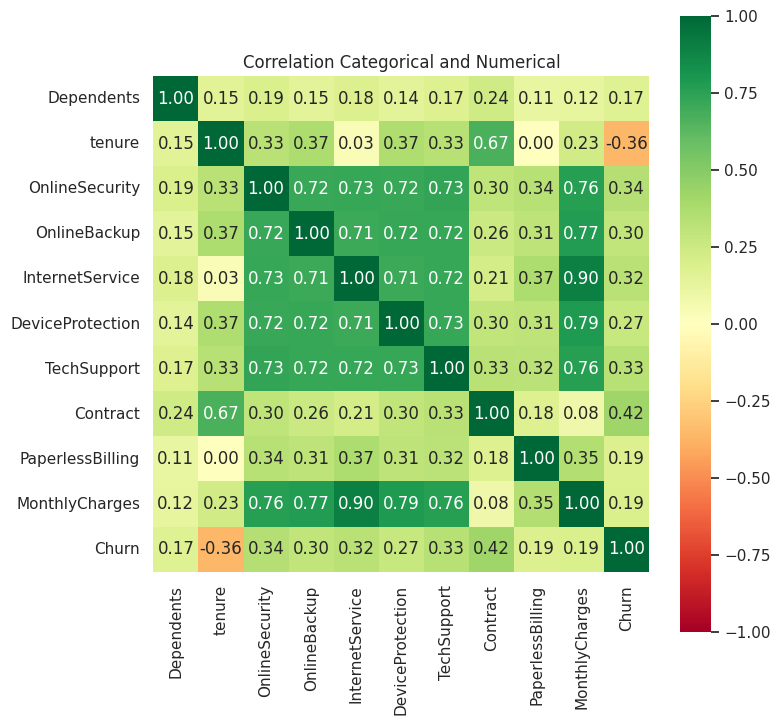

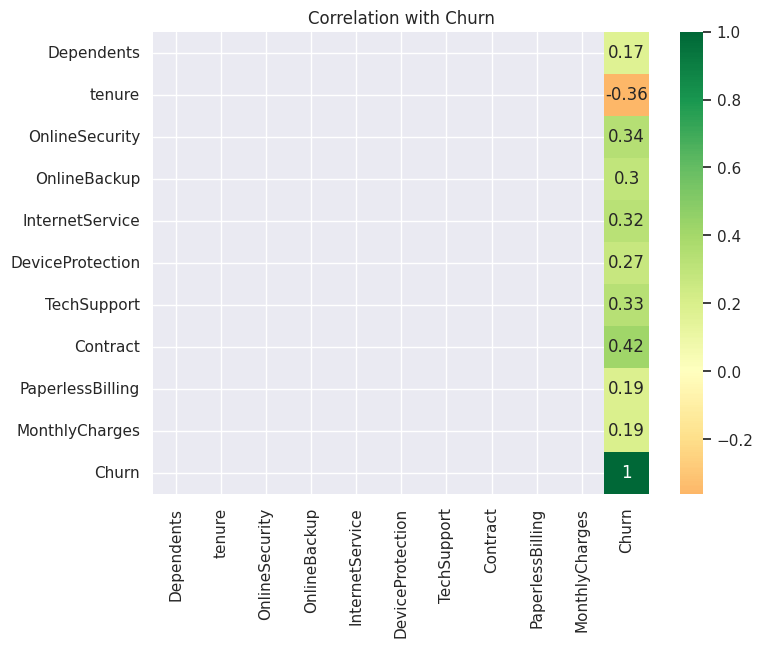

In [74]:
complete_correlation = associations(
    df,
    cmap='RdYlGn',
    title='Correlation Categorical and Numerical',
    figsize=(8,8),
    annot=True
)

correlation_matrix = complete_correlation['corr']

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[:, correlation_matrix.columns.get_loc('Churn')] = True
masked_correlation = np.where(mask, correlation_matrix, np.nan)

plt.figure(figsize=(8, 6))
sns.heatmap(masked_correlation, annot=True, cmap='RdYlGn', cbar=True, center=0,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.index)
plt.title('Correlation with Churn')
plt.show()

Hasil Korelasi tersebut menunjukkan ada tujuh variabel yang memiliki korelasi yang cukup kuat dengan Tingkat Churn diantaranya Tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, dan Contract. Hasil korelasi ini akan digunakan untuk tahap berikutnya.

In [75]:
# Define kolom berdasarkan tipenya
numeric_columns = ['tenure']
one_hot_cols = ['OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport']
ordinal_cols = ['Contract']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
])

In [76]:
# Define the models
models = {
    'Logistic Regression': lr
}

# Define the resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42)
}

# Custom F2-score metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Prepare a DataFrame to store results
results = []

# Loop through each model and resampling method
for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    # Loop through each resampling method
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('resampling', resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)
        recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Resampling Method': resampling_name,
            'Mean F2 Score': np.mean(f2_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F2 Score': np.std(f2_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })

# Create a DataFrame from the results
results_df_exp2 = pd.DataFrame(results)
results_df_exp2

Model: Logistic Regression processing...
	Resampling: ADASYN processing...


,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Logistic Regression,ADASYN,0.717203,0.812621,0.488373,0.006688,0.012509,0.010857


Penurunan performa model Logistic Regression setelah penerapan feature selection berbasis korelasi dan resampling ADASYN (F2 score turun dari 0.722724 menjadi 0.717 dan recall dari 0.818447 menjadi 0.812) kemungkinan terjadi karena feature selection berbasis korelasi menghilangkan fitur yang meskipun memiliki korelasi rendah dengan target, tetap memberikan kontribusi prediktif penting melalui hubungan non-linier atau interaksi antar fitur yang tidak terdeteksi oleh metode korelasi seperti Spearman. Teknik ADASYN, yang menghasilkan sampel sintetis untuk kelas minoritas (churn), mungkin menjadi kurang efektif ketika fitur berkurang, karena data sintetis tersebut kehilangan informasi kontekstual dari fitur yang dibuang, sehingga mengurangi kemampuan model dalam menangkap pola churn secara akurat. Selain itu, Logistic Regression sebagai model linier bergantung pada semua fitur yang relevan untuk membentuk keputusan yang optimal, dan penghapusan fitur tertentu dapat menyebabkan hilangnya informasi penting, meskipun fitur tersebut tidak berkorelasi kuat dengan target, yang pada akhirnya menurunkan recall dan F2 score dalam deteksi churn.

## Menggunakan Feature Importance dari Logistic Regression

In [77]:
# Define kolom berdasarkan tipenya
numeric_columns = ['tenure', 'MonthlyCharges']
one_hot_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
ordinal_cols = ['Contract']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
])

In [78]:
# Define the models
models = {
    'Logistic Regression': lr
}

# Define the resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42)
}

pipeline = Pipeline(steps=[
      ('prep', preprocessor),
      ('resampling', resampling),
      ('model', model)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['Contract'])])),
                ('resampling', ADASYN(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [79]:
# Dapatkan nama fitur setelah preprocessor
feature_names = pipeline.named_steps['prep'].get_feature_names_out()

# Dapatkan coefficient
feature_importance = pipeline.named_steps['model'].coef_[0]

# Masukkan ke dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                                             Feature  Importance
1                            numeric__MonthlyCharges    1.150770
20                  onehot_cat__PaperlessBilling_Yes    0.330043
11           onehot_cat__InternetService_Fiber optic    0.325816
4                      onehot_cat__OnlineSecurity_No    0.317196
16                        onehot_cat__TechSupport_No    0.235220
2                          onehot_cat__Dependents_No    0.226855
15                  onehot_cat__DeviceProtection_Yes    0.194367
7                        onehot_cat__OnlineBackup_No    0.146033
9                       onehot_cat__OnlineBackup_Yes    0.113918
13                   onehot_cat__DeviceProtection_No    0.065583
3                         onehot_cat__Dependents_Yes    0.063980
5     onehot_cat__OnlineSecurity_No internet service    0.030885
17       onehot_cat__TechSupport_No internet service    0.030885
12                    onehot_cat__InternetService_No    0.030885
8       onehot_cat__Onlin

Faktor Pendorong Churn: Biaya bulanan tinggi (MonthlyCharges) adalah pendorong utama churn, diikuti oleh ketidakadaan layanan tambahan seperti OnlineSecurity, OnlineBackup, TechSupport, dan DeviceProtection. Pelanggan dengan tanggungan atau mereka yang tidak menggunakan tagihan elektronik juga lebih berisiko.

Faktor Retensi: Lama berlangganan (tenure) adalah faktor terkuat dalam mencegah churn, diikuti oleh kontrak jangka panjang, kehadiran layanan seperti keamanan online dan jenis layanan DSL.



In [80]:
# Define kolom berdasarkan tipenya
numeric_columns = ['MonthlyCharges']
one_hot_cols = ['InternetService', 'OnlineSecurity', 'Dependents', 'PaperlessBilling',  'OnlineBackup', 'TechSupport', 'DeviceProtection']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
])

In [81]:
# Define the models
models = {
    'Logistic Regression': lr
}

# Define the resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42)
}

pipeline = Pipeline(steps=[
      ('prep', preprocessor),
      ('resampling', resampling),
      ('model', model)])

pipeline.fit(X_train, y_train)

# F2, Recall, Precision
f2_scorer = make_scorer(fbeta_score, beta=2)
recall_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score)

from sklearn.metrics import fbeta_score, recall_score, precision_score

# Prediksi data train dan test
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Hitung skor di data TRAIN
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)

# Hitung skor di data TEST
f2_test = fbeta_score(y_test, y_test_pred, beta=2)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)

# Tampilkan hasil
print("Skor di Data Train:")
print(f"F2 Score     : {f2_train:.4f}")
print(f"Recall       : {recall_train:.4f}")
print(f"Precision    : {precision_train:.4f}")

print("\nSkor di Data Test:")
print(f"F2 Score     : {f2_test:.4f}")
print(f"Recall       : {recall_test:.4f}")
print(f"Precision    : {precision_test:.4f}")


Skor di Data Train:
F2 Score     : 0.6889
Recall       : 0.7893
Precision    : 0.4565

Skor di Data Test:
F2 Score     : 0.7086
Recall       : 0.8217
Precision    : 0.4569


Model menunjukkan performa yang kuat dalam mendeteksi pelanggan churn, dengan recall tinggi yang konsisten (**78.9% di data train** dan **82.1% di data test**), mencerminkan kemampuan model untuk menangkap mayoritas pelanggan yang berisiko churn, sesuai dengan tujuan bisnis untuk meminimalkan kehilangan pelanggan.
Dengan **F2 score** sebesar **0.6889 di train** dan meningkat menjadi **0.7086 di test**, ini menunjukkan model menyeimbangkan performa secara baik, dengan **penekanan yang lebih besar pada recall** daripada precision — sesuai dengan konteks churn prediction, dimana lebih penting untuk menangkap sebanyak mungkin pelanggan yang berpotensi churn, meskipun itu berarti mengorbankan sedikit akurasi pada precision. Stabilitas F2 score yang bahkan lebih tinggi di data test juga menandakan bahwa model memiliki **daya generalisasi yang baik** dan tidak sekadar overfitting pada data train.

In [82]:
best_model = Pipeline([
    ('prep', preprocessor),
    ('balancing', ADASYN(random_state=42)),
    ('model', lr)
])

best_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['MonthlyCharges']),
                                                 ('onehot_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'Dependents',
                                                   'PaperlessBilling',
                                                   'OnlineBackup',
                                                   'TechSupport',
                                                   'DeviceProtection'])])),
                ('balancing', ADASYN(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

Pipeline ini menunjukkan implementasi dan performa model terbaik yaitu Logistic Regression dalam sebuah pipeline. Pipeline ini mencakup beberapa tahapan penting: transformasi data menggunakan ColumnTransformer (prep), penskalaan numerik dengan MinMaxScaler, encoding kategori dengan OneHotEncoder, penanganan ketidakseimbangan data menggunakan ADASYN, dan model Logistic Regression. Model ini dilatih menggunakan data latih (X_train, y_train).

In [83]:
# Prediksi
y_pred = best_model.predict(X_test)

# Laporan klasifikasi standar
print(classification_report(y_test, y_pred))

# Hitung F2-score untuk masing-masing kelas
f2_per_class = fbeta_score(y_test, y_pred, beta=2, average=None)

print(f"F2 Score untuk kelas 0: {f2_per_class[0]:.4f}")
print(f"F2 Score untuk kelas 1: {f2_per_class[1]:.4f}")

# Hitung dan cetak F2-score (macro average)
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       713
           1       0.46      0.82      0.59       258

    accuracy                           0.69       971
   macro avg       0.68      0.73      0.67       971
weighted avg       0.79      0.69      0.71       971

F2 Score untuk kelas 0: 0.6862
F2 Score untuk kelas 1: 0.7086
F2 Score (macro avg): 0.6974


Analisis model Logistic Regression ini menunjukkan bahwa kelas 1 (pelanggan churn/Yes) memiliki recall 0,82, menandakan kemampuan baik dalam mendeteksi 82% pelanggan yang benar-benar churn, sejalan dengan prioritas meminimalkan False Negatives, namun masih memiliki kelemahan dalam hal akurasi prediksi (precision hanya 46%), yang berarti banyak pelanggan loyal yang salah teridentifikasi sebagai churn.

Sementara itu, untuk kelas 0 (pelanggan yang tetap/No), recall sebesar 0.65 berarti model hanya berhasil mengenali 65% dari pelanggan yang benar-benar loyal, sementara sisanya salah diklasifikasikan sebagai churn. Precision kelas 0 sebesar 91% menunjukkan bahwa ketika model memprediksi seorang pelanggan akan tetap, prediksi tersebut cukup akurat — 91% benar-benar loyal.

Secara keseluruhan, model lebih fokus menangkap sebanyak mungkin pelanggan churn, yang memang sesuai dengan strategi bisnis Telco dimana mencegah kehilangan pelanggan lebih penting dibanding biaya retensi yang salah sasaran.

# Experiment 4 - Menggunakan semua Feature, Resampling, Logistic Regression, Hyperparameter Tuning

In [84]:
# Define kolom berdasarkan tipenya
numeric_columns = ['tenure', 'MonthlyCharges']
one_hot_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
ordinal_cols = ['Contract']

# Pipeline kategorik untuk one-hot dan ordinal encoding
numeric_pipeline = num_pipe(scaling="minmax")
onehot_pipeline = cat_pipe(encoder="onehot")
ordinal_pipeline = cat_pipe(encoder="ordinal")

preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('onehot_cat', onehot_pipeline, one_hot_cols),
    ('ordinal_cat', ordinal_pipeline, ordinal_cols),
])

In [85]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
# contoh hasil resampler pada semua undersampler


# Define the models
models = {
    'Logistic Regression': lr
}

# Define the resampling methods
resampling_methods = {
    'ADASYN': ADASYN(random_state=42)}

# Custom F2-score metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Prepare a DataFrame to store results
results = []

# Loop through each model and resampling method
for model_name, model in models.items():
    print(f"Model: {model_name} processing...")
    # Loop through each resampling method
    for resampling_name, resampling in resampling_methods.items():
        print(f"\tResampling: {resampling_name} processing...")
        # Create a pipeline with the resampling method and the model
        pipeline = Pipeline(steps=[
              ('prep', preprocessor),
              ('resampling', resampling),
              ('model', model)])

        # Perform cross-validation
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f2_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring=f2_scorer)
        recall_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
        precision_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='precision')

        # Store the results
        results.append({
            'Model': model_name,
            'Resampling Method': resampling_name,
            'Mean F2 Score': np.mean(f2_scores),
            'Mean Recall': np.mean(recall_scores),
            'Mean Precision': np.mean(precision_scores),
            'Std F2 Score': np.std(f2_scores),
            'Std Recall': np.std(recall_scores),
            'Std Precision': np.std(precision_scores)
        })

# Create a DataFrame from the results
results_df_exp2 = pd.DataFrame(results)
results_df_exp2

Model: Logistic Regression processing...
	Resampling: ADASYN processing...


,Model,Resampling Method,Mean F2 Score,Mean Recall,Mean Precision,Std F2 Score,Std Recall,Std Precision
0,Logistic Regression,ADASYN,0.722724,0.818447,0.49268,0.008134,0.012509,0.01069


## Grid Search

In [86]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
import numpy as np

# Define the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Define the Adasyn resampling method
adasyn = ADASYN(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__C': np.logspace(-4, 4, 10),  # Regularization parameter
    'model__penalty': ['l1', 'l2'],      # Norm used in penalization
    'model__solver': ['liblinear', 'saga'],  # Algorithm to use
}

# Create a pipeline
pipeline = Pipeline(steps=[
    ('prep', preprocessor),
    ('resampling', adasyn),
    ('model', lr)
])

# Custom F2-score metric
f2_scorer = make_scorer(fbeta_score, beta=2)

# Perform GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f2_scorer,
    n_jobs=-1
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best F2 score:", grid_search.best_score_)

# Store results
best_model = grid_search.best_estimator_
results = {
    'Best Model': best_model,
    'Best Parameters': grid_search.best_params_,
    'Best F2 Score': grid_search.best_score_
}

Best parameters: {'model__C': np.float64(0.046415888336127774), 'model__penalty': 'l1', 'model__solver': 'saga'}
Best F2 score: 0.7259596600293364


Hasil hyperparameter tuning dengan Grid Search pada model Logistic Regression ini menunjukkan parameter optimal dengan F2 Score terbaik sebesar 0.7259, mengindikasikan performa yang kuat dalam mendeteksi pelanggan yang churn dengan prioritas pada recall untuk meminimalkan False Negatives, sesuai dengan kebutuhan bisnis Telco dalam mencegah kehilangan pelanggan. Nilai `model__C` yang rendah menunjukkan regularisasi kuat untuk mencegah overfitting, sementara `penalty='l1'` (Lasso) membantu seleksi fitur dengan meniadakan koefisien tidak relevan, dan `solver='saga'` mendukung efisiensi pada dataset besar dan mendukung kombinasi penalty L1 dengan regularisasi kuat.

In [87]:
# F2, Recall, Precision
f2_scorer = make_scorer(fbeta_score, beta=2)
recall_scorer = make_scorer(recall_score)
precision_scorer = make_scorer(precision_score)

from sklearn.metrics import fbeta_score, recall_score, precision_score

# Prediksi data train dan test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Hitung skor di data TRAIN
f2_train = fbeta_score(y_train, y_train_pred, beta=2)
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)

# Hitung skor di data TEST
f2_test = fbeta_score(y_test, y_test_pred, beta=2)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)

# Tampilkan hasil
print("Skor di Data Train:")
print(f"F2 Score     : {f2_train:.4f}")
print(f"Recall       : {recall_train:.4f}")
print(f"Precision    : {precision_train:.4f}")

print("\nSkor di Data Test:")
print(f"F2 Score     : {f2_test:.4f}")
print(f"Recall       : {recall_test:.4f}")
print(f"Precision    : {precision_test:.4f}")


Skor di Data Train:
F2 Score     : 0.7294
Recall       : 0.8427
Precision    : 0.4743

Skor di Data Test:
F2 Score     : 0.7412
Recall       : 0.8527
Precision    : 0.4867


Model menunjukkan performa yang solid dalam memprediksi churn, dengan **recall tinggi** baik di data train (**84.27%**) maupun test (**85.27%**). Ini berarti model sangat efektif dalam menangkap sebagian besar pelanggan yang benar-benar berisiko churn, yang penting dalam konteks bisnis untuk tindakan retensi.
Dengan **F2 score** yang mencapai **0.7294** di train dan **0.7412** di test, model ini menunjukkan keseimbangan yang baik dengan **penekanan lebih pada recall**, yang sesuai dengan strategi churn prevention. F2 score yang stabil dan sedikit lebih tinggi di data test menunjukkan bahwa model ini **tidak overfitting** dan mampu **menggeneralisasi** dengan baik ke data baru.


In [88]:
# Prediksi
y_pred = best_model.predict(X_test)

# Laporan klasifikasi standar
print(classification_report(y_test, y_pred))

# Hitung F2-score untuk masing-masing kelas
f2_per_class = fbeta_score(y_test, y_pred, beta=2, average=None)

print(f"F2 Score untuk kelas 0: {f2_per_class[0]:.4f}")
print(f"F2 Score untuk kelas 1: {f2_per_class[1]:.4f}")

# Hitung dan cetak F2-score (macro average)
f2_macro = fbeta_score(y_test, y_pred, beta=2, average="macro")
print(f'F2 Score (macro avg): {f2_macro:.4f}')

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       713
           1       0.49      0.85      0.62       258

    accuracy                           0.72       971
   macro avg       0.71      0.76      0.70       971
weighted avg       0.81      0.72      0.74       971

F2 Score untuk kelas 0: 0.7134
F2 Score untuk kelas 1: 0.7412
F2 Score (macro avg): 0.7273


Model menunjukkan **recall tinggi (85%) untuk kelas 1** (pelanggan churn), artinya model efektif dalam menangkap pelanggan yang berisiko berhenti berlangganan. Namun, precision untuk kelas ini masih di angka **49%**, menunjukkan bahwa masih ada cukup banyak false positive — pelanggan yang diprediksi churn padahal sebenarnya tidak.
Untuk **kelas 0** (non-churn), precision sangat tinggi (**93%**), tapi recall lebih rendah (**67%**), artinya ada sejumlah pelanggan non-churn yang keliru diprediksi sebagai churn.

F2 score untuk kelas 1, yaitu **0.7412**, menunjukkan performa yang kuat dalam mengutamakan recall — yang sesuai dengan prioritas bisnis untuk **mengidentifikasi sebanyak mungkin pelanggan churn**.
**Macro average F2 score** sebesar **0.7273** mengindikasikan model cukup seimbang secara keseluruhan, dengan kinerja yang stabil antara kedua kelas meskipun fokus utamanya tetap pada pencegahan churn.

# Train and Test Model After Tuning

In [89]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }
    return metrics

# Latih dan evaluasi model sebelum tuning
pipeline.fit(X_train, y_train)
final_model_metrics = evaluate_model(pipeline, X_test, y_test)

# Latih dan evaluasi model setelah tuning
best_model_after_tuning = grid_search.best_estimator_
best_model_after_tuning.fit(X_train, y_train)
best_model_metrics = evaluate_model(best_model_after_tuning, X_test, y_test)

# Buat DataFrame untuk membandingkan hasil
comparison_df = pd.DataFrame({
    'Metric': final_model_metrics.keys(),
    'Best Model (Before Tuning)': final_model_metrics.values(),
    'Best Model (After Tuning)': best_model_metrics.values()
})
comparison_df

,Metric,Best Model (Before Tuning),Best Model (After Tuning)
0,Accuracy,0.727085,0.721936
1,F2 Score,0.738983,0.741240
2,Precision,0.492099,0.486726
3,Recall,0.844961,0.852713


Hasil analisis ini membandingkan performa model Logistic Regression sebelum dan sesudah tuning hyperparameter, dengan fokus utama pada deteksi churn (kelas 1). Akurasi sedikit menurun dari **0.7271** menjadi **0.7219** setelah tuning, yang mencerminkan adanya pergeseran prioritas dari sekadar prediksi keseluruhan menuju deteksi churn yang lebih spesifik. Hal ini didukung oleh peningkatan pada **F2 Score** dari **0.7389** menjadi **0.7412**, yang menegaskan bahwa model pasca-tuning lebih efektif dalam menangani ketidakseimbangan kelas, dengan bobot lebih besar pada recall.
Recall juga mengalami peningkatan dari **0.8449** menjadi **0.8527**, menunjukkan bahwa model mampu mendeteksi sekitar 85% pelanggan churn, yang berarti lebih baik dalam meminimalkan False Negatives — selaras dengan tujuan bisnis untuk mencegah kehilangan pelanggan. Meskipun precision sedikit menurun (dari **0.4921** menjadi **0.4867**), peningkatan recall dan F2 score menunjukkan trade-off yang tepat demi strategi retensi yang lebih agresif dan efektif.

# Evaluation Metrics

## Confusion matrix

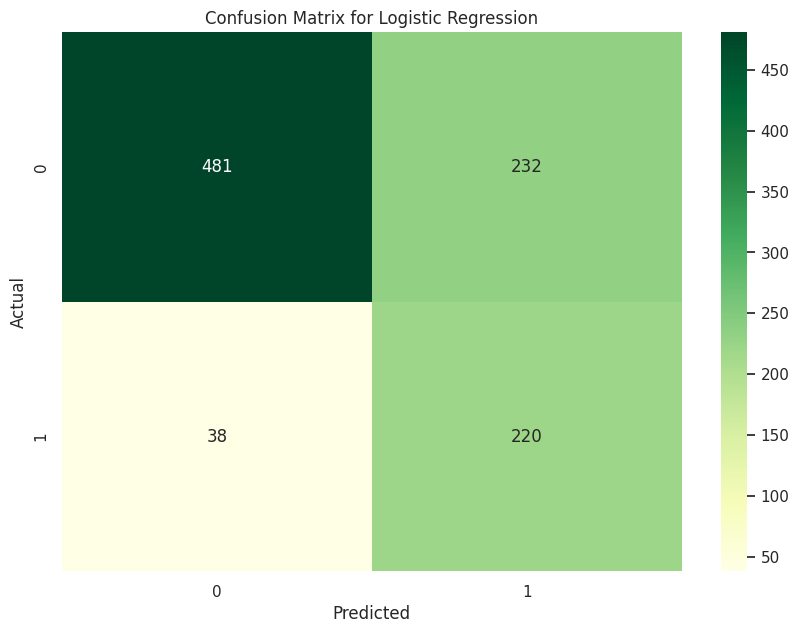

In [90]:
# Evaluation with Best Estimator
y_pred_test = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Berdasarkan confusion matrix yang ditampilkan, model Logistic Regression berhasil mengklasifikasikan **481 pelanggan** sebagai tidak churn (true negative) dan **220 pelanggan** sebagai churn (true positive) secara benar. Namun, masih terdapat **38 pelanggan** yang sebenarnya churn tetapi diprediksi tidak churn (false negative), serta **232 pelanggan** yang sebenarnya tidak churn tetapi diprediksi akan churn (false positive).
Dengan total **713 data non-churn** dan **258 data churn**, model ini berhasil mendeteksi sekitar **85.27%** pelanggan churn (recall = 220 / (220 + 38)), selaras dengan prioritas untuk meminimalkan False Negatives demi mencegah kehilangan pelanggan. Hal ini menunjukkan bahwa model ini cocok diterapkan pada kasus bisnis di mana deteksi pelanggan yang berisiko churn lebih penting daripada kesalahan dalam memprediksi pelanggan yang loyal.

## ROC and Precision-Recall Curve

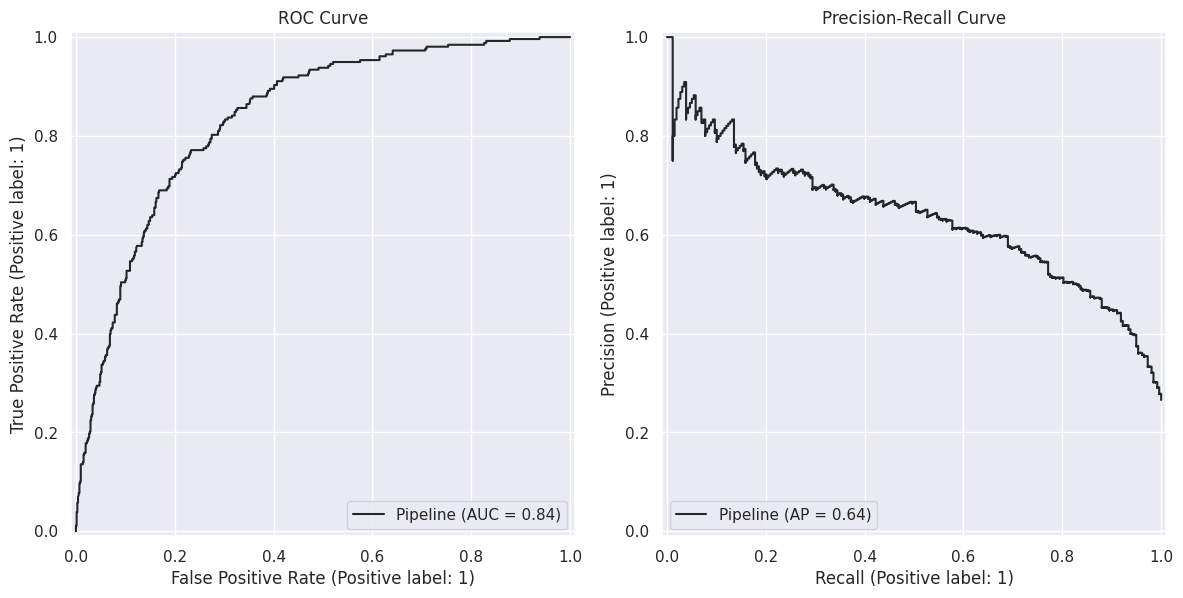

In [91]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax1)
PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')

plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, model Logistic Regression yang telah dituning menunjukkan performa yang solid. Pada grafik **ROC Curve** (kiri), nilai **AUC sebesar 0.84** mengindikasikan bahwa model mampu membedakan dengan baik antara pelanggan yang churn dan yang tidak churn, dengan tingkat diskriminasi yang tergolong **sangat baik** (mendekati 1). Sementara itu, pada grafik **Precision-Recall Curve** (kanan), nilai **Average Precision (AP) sebesar 0.64** menunjukkan bahwa model memiliki ketepatan yang cukup baik dalam memprediksi pelanggan yang akan churn, terutama mengingat ketidakseimbangan data.
Secara keseluruhan, model ini **efektif untuk deteksi churn**, dengan keseimbangan antara kemampuan menangkap pelanggan churn (recall tinggi) dan ketepatan prediksi (precision moderat), sehingga relevan untuk prioritas bisnis yang fokus meminimalkan kehilangan pelanggan.


## Feature Importance

In [92]:
# Define Logistic Regression and RandomUnderSampler
logreg = LogisticRegression(random_state=42)
adasyn = ADASYN(random_state=42)

# Create pipeline using imblearn
estimator = Pipeline([
    ('prep', preprocessor),
    ('resample', adasyn),
    ('model', logreg)
])
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

# Evaluate
recall = recall_score(y_test, y_pred)

<Axes: title={'center': 'Feature Coefficients of the FINAL MODEL'}>

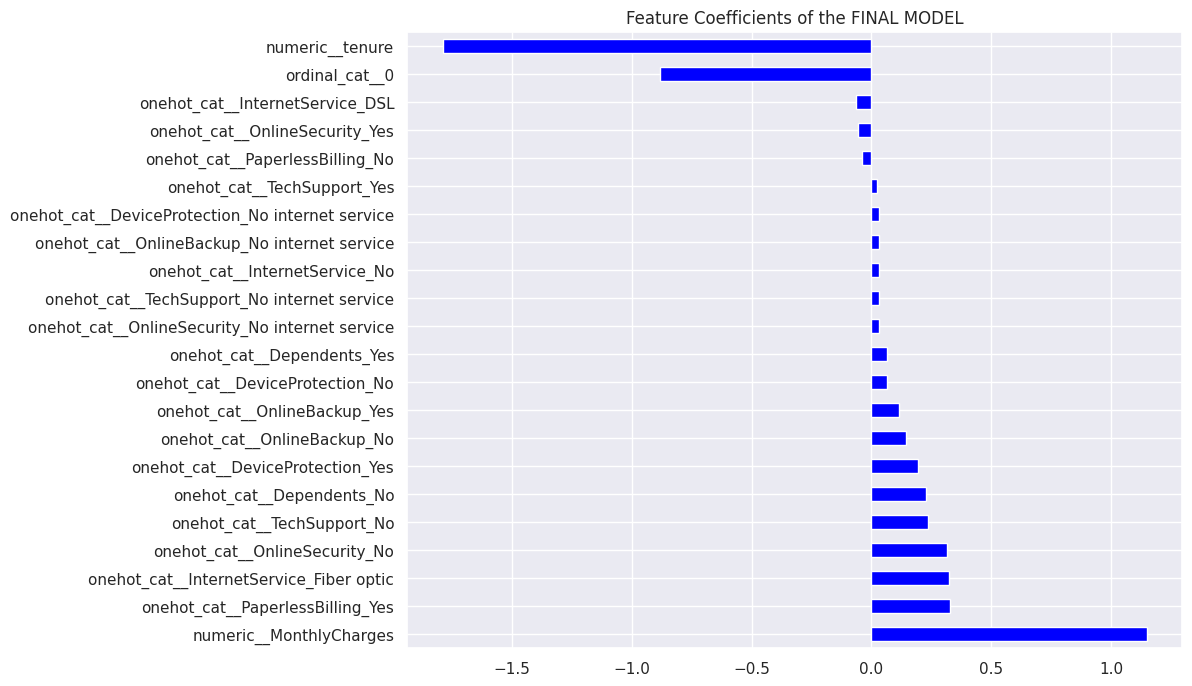

In [93]:
plt.figure(figsize=(10, 8))

coef = pd.Series(estimator['model'].coef_[0], preprocessor.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Coefficients of the FINAL MODEL', color='blue')

Koefisien Feature Logistic Regression:

* **Fitur dengan koefisien negatif besar (menurunkan risiko churn):**

  * `numeric__tenure`: Semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka churn, menegaskan pentingnya mempertahankan pelanggan jangka panjang.
  * `ordinal_cat` : Kontrak dengan durasi yang lebih panjang atau bersifat lebih mengikat berkontribusi menekan kemungkinan pelanggan melakukan churn. Artinya, pelanggan dengan kontrak jangka panjang cenderung lebih loyal dan bertahan lebih lama.

* **Fitur dengan koefisien positif besar (meningkatkan risiko churn):**

  * `numeric__MonthlyCharges`: Menunjukkan bahwa biaya bulanan yang tinggi meningkatkan risiko churn, mencerminkan sensitivitas pelanggan terhadap harga.
  * `onehot_cat__InternetService_Fiber optic`: Pengguna layanan Fiber optic lebih berisiko churn dibanding layanan lain, mungkin karena ekspektasi layanan yang lebih tinggi.

* **Fitur lain yang memiliki pengaruh:**

 * `onehot_cat__OnlineSecurity_Yes`: fitur ini menunjukkan efek negatif, mengindikasikan bahwa pelanggan yang memanfaatkan layanan keamanan online dan backup online cenderung lebih kecil kemungkinannya untuk berhenti berlangganan.

# Conclusion and Recommendation

## Conclusion


Hasil eksperimen menunjukkan bahwa model Logistic Regression dengan semua fitur, teknik resampling NearMiss, dan hyperparameter tuning Grid Search memberikan performa terbaik, dengan F2 score sebesar 0.7412 dan recall mencapai 85.27%. Ini unggul signifikan dibandingkan model dengan semua fitur dan ADASYN (F2 score 0.7227, recall 81.8%), maupun pendekatan feature selection berbasis korelasi (F2 score 0.717, recall 81.2%) dan importance Logistic Regression (F2 score 0.7086, recall 82.1%). Performa terbaik yang dicapai pada model full-feature mengindikasikan bahwa informasi prediktif tersebar di banyak fitur, termasuk fitur-fitur yang secara individual tampak lemah (berkorelasi rendah atau memiliki importance kecil), namun saling melengkapi saat digabungkan dalam model. Seleksi fitur yang terlalu agresif justru mengeliminasi sinyal minor ini, sehingga menurunkan kekuatan prediksi. Sementara itu, kombinasi teknik NearMiss dengan tuning parameter secara optimal mampu menyeimbangkan distribusi kelas minor tanpa menambah noise seperti pada ADASYN, sehingga model lebih efektif dalam mendeteksi pola churn yang halus namun penting. Hal ini tercermin dari kenaikan recall yang signifikan dengan F2 score terbaik, menjadikan model ini paling tepat digunakan untuk tujuan deteksi churn yang menuntut sensitivitas tinggi.

## Impact Model to Business


Tingkat churn di kalangan pelanggan Telco tercatat sebesar 26.5%, di mana dari 4853 pelanggan, sebanyak 1286 orang telah berhenti berlangganan, sementara 3567 pelanggan atau 73.5% masih aktif.

**Asumsi Biaya Telco**

Pada laporan tahunannya, First Page Sage merilis data rata-rata Customer Acquisition Cost (CAC) per industri untuk B2B (Business to Business).
Berdasarkan laporan tersebut, industri Telekomunikasi memiliki rata-rata **CAC sebesar $694 per pelanggan baru**.

Ini artinya, untuk setiap pelanggan baru yang didapatkan, perusahaan Telco perlu mengeluarkan rata-rata $694 dalam bentuk biaya pemasaran, iklan, promosi, dan tenaga penjualan.

Artikel di Forbes menyatakan bahwa secara umum, biaya untuk mempertahankan pelanggan (retention) adalah 4-5 kali lebih murah dibandingkan dengan biaya untuk mengakuisisi pelanggan baru.
Dengan kata lain, retention cost itu hanya sekitar 1/4 (25%) dari acquisition cost.
Dalam perhitungan ini, **Retention Cost = 1/4 dari $694 USD, yaitu 173.5 USD per pelanggan.**


**Statistik Churn Aktual (y\_test):**

* 0 (tidak churn) = 481 + 232 = 713 pelanggan
* 1 (churn) = 38 + 220 = 258 pelanggan
  
  Total data = 713 + 258 = 971 pelanggan

**Tanpa Model:**

Tanpa model, kita hanya bisa reaktif, jadi kita asumsikan semua 258 pelanggan

yang churn harus digantikan lewat akuisisi.

* Total pelanggan churn: 258
* Biaya akuisisi: 258 x $694 = $179,052 USD
* Total Biaya Tanpa Model: $179,052 USD
* Penghematan: 0 USD

Nilai dari confusion matrix:

|                | Predicted 0 | Predicted 1 |
| -------------- | ----------- | ----------- |
| Actual 0 (No)  | 481 (TN)    | 232 (FP)    |
| Actual 1 (Yes) | 38 (FN)     | 220 (TP)    |

**Dengan Model (berdasarkan confusion matrix)**

**1. Biaya Retention (Promosi ke pelanggan yang diprediksi churn)**

* Retention Cost per customer = \$173.5 USD
* Total pelanggan yang diprediksi churn = TP + FP = 220 + 232 = 452 pelanggan
* Biaya Promosi: 452 x \$173.5 = \$78,442 USD

**2. Biaya Akuisisi (untuk yang gagal diselamatkan — False Negatives)**

* FN = 38 pelanggan
* Biaya Akuisisi: 38 x \$694 = \$26,372 USD

**3. Total Biaya Dengan Model**

* Total biaya = Biaya Promosi + Biaya Akuisisi
* \$78,442 + \$26,372 = \$104,814 USD


**Perhitungan Penghematan**

* Total biaya tanpa model - Total biaya dengan model
* \$179,052 - \$104,814 = \$74,238 USD

**Kesimpulan:**

Dengan menggunakan model machine learning:

* Perusahaan hanya mengeluarkan \$78,442 untuk melakukan promosi retention ke 452 pelanggan (yang diprediksi churn).
* Hanya 38 pelanggan yang tetap churn dan butuh biaya akuisisi \$26,372.
* Sehingga total biaya menjadi \$104,814, jauh lebih rendah dibandingkan tanpa model.
* Penghematan yang dihasilkan adalah \$74,238.

Artinya, model berhasil menekan biaya churn lebih dari 41% dibandingkan jika perusahaan hanya membiarkan semua pelanggan churn tanpa prediksi.



## Recommendation

**Modelling**

**Analisis Kohort:**

* Terapkan pendekatan kohort untuk mengevaluasi pola perilaku pelanggan berdasarkan periode pendaftaran atau aktivitas mereka, sehingga dapat terlihat dinamika churn dalam berbagai rentang waktu.

**Eksperimen dengan Beragam Algoritma ML:**

* Uji beberapa model machine learning alternatif dan lakukan penyetelan hyperparameter secara sistematis guna mendapatkan model yang memberikan kinerja prediksi paling akurat.

**Monitoring Kinerja Model:**

* Jalankan proses monitoring rutin terhadap model untuk memastikan akurasinya tetap tinggi, khususnya ketika terjadi perubahan dalam pola perilaku pelanggan atau kondisi bisnis yang memengaruhi churn.

**Pendalaman Insight Model:**

* Prioritaskan analisis mendalam terhadap hasil model untuk mengidentifikasi penyebab utama churn. Manfaatkan temuan ini untuk merancang program retensi pelanggan yang lebih tajam dan efektif.

**Bisnis**:
* **Prioritaskan Penawaran Kontrak Jangka Panjang:**
  Pelanggan dengan langganan bulanan terbukti memiliki risiko churn yang lebih tinggi dibandingkan mereka yang memilih kontrak tahunan atau dua tahunan. Oleh sebab itu, perusahaan disarankan untuk mendorong pelanggan beralih ke kontrak jangka panjang melalui insentif seperti diskon, bonus layanan tambahan, atau fitur eksklusif bagi pelanggan kontrak panjang.

* **Tinjau Struktur Tarif Bulanan:**
  Tarif bulanan (*MonthlyCharges*) menjadi faktor penting dalam keputusan pelanggan untuk berhenti berlangganan. Perusahaan sebaiknya melakukan review terhadap skema harga saat ini dan membandingkannya dengan tarif yang ditawarkan pesaing. Menyediakan paket yang lebih kompetitif dengan nilai tambah yang jelas akan membantu meningkatkan retensi pelanggan.

* **Lakukan Pemasaran yang Lebih Terarah:**
  Bangun strategi kampanye pemasaran yang lebih terfokus, dengan menyasar segmen pelanggan yang menunjukkan potensi churn lebih tinggi menggunakan pendekatan yang dipersonalisasi.

* **Perkuat Onboarding dan Dukungan Awal untuk Pelanggan Baru:**
  Berikan insentif yang lebih menarik serta dukungan layanan yang lebih responsif di fase awal langganan pelanggan baru, sehingga mereka lebih termotivasi untuk tetap menggunakan layanan dalam jangka panjang.
